# Youtube Trends from 2017-2018

In this project I am going to explore videos that have trended in the United States, Canada, and Great Britain from 2017 to 2018

There are some videos that are from long before, but theyre small enough to not skew the dataset.

To preface, Youtube has not given out the reason why videos trend, but most people believe it is a combination of views, likes, dislikes, and comment count. I want to figure out what makes a video trend if possible. If not, at least predict how many views a video would get given a certain amount of likes, dislikes, and comments.

I figure it would also be pretty cool to see what each country watches especially since we all share English as a common language. 

First, I want to make sure I can read the csvs properly. I downloaded them off of Kaggle, and renamed them to videos1, videos2, and videos3, as US, CA, and GB respectively.

In [1]:
import pandas as pd
import numpy as np

df_US = pd.read_csv("videos1.csv")
df_US['channel_title'].head(25)

0              CaseyNeistat
1           LastWeekTonight
2              Rudy Mancuso
3     Good Mythical Morning
4                  nigahiga
5                  iJustine
6       Saturday Night Live
7        CrazyRussianHacker
8          20th Century Fox
9                       Vox
10                      NFL
11                      amc
12               marshmello
13            NowThis World
14          The king of DIY
15           BostonDynamics
16                  Cracked
17                   TED-Ed
18              PeterSripol
19                  SciShow
20              Life Noggin
21                   Tested
22                Tom Scott
23               Refinery29
24              Gus Johnson
Name: channel_title, dtype: object

In [2]:
df_CA = pd.read_csv("videos2.csv")
df_CA['channel_title'].head(25)

0                 EminemVEVO
1                  iDubbbzTV
2               Rudy Mancuso
3                   nigahiga
4                 Ed Sheeran
5                 DramaAlert
6               VanossGaming
7               CaseyNeistat
8           Logan Paul Vlogs
9                Sheikh Musa
10                 21 Savage
11               Troom Troom
12                      大劇獨播
13             Speed Records
14                       FBE
15              BuzzFeedBlue
16                      NELK
17    The Graham Norton Show
18             Rooster Teeth
19           Lokdhun Punjabi
20        CrazyRussianHacker
21     Good Mythical Morning
22                     The Q
23                 Jake Paul
24                     REACT
Name: channel_title, dtype: object

In [3]:
df_GB = pd.read_csv("videos3.csv")
df_GB['channel_title'].head(25)

0                               John Lewis
1                      Saturday Night Live
2                               EminemVEVO
3               Salford City Football Club
4                         Cute Girl Videos
5                       PointlessBlogVlogs
6                               Ed Sheeran
7                               MoreZoella
8                                ElbowVEVO
9                        JenniferLopezVEVO
10                             Nile Wilson
11                          Inside Edition
12                       OfficialGucciMane
13                            John Maclean
14                              HowToBasic
15                   Good Mythical Morning
16                               BBC Music
17                       CamilaCabelloVEVO
18                          IISuperwomanII
19                  ABC Television Network
20                       Sprinkleofglitter
21    The Late Late Show with James Corden
22                              marshmello
23         

## Reading Finished!

Awesome! Now they can properly be read.

Now, I want to merge them together so I won't have to deal with multiple csvs at a time.

It's way easier to deal with one big dataset anyway.

So with glob, I'm going to iterate through each csv and concatenate them to form one big dataframe, with a column denoting which sourcefile they originated from.

In [4]:
import glob

vidfiles = sorted(glob.glob('videos*.csv'))
vidfiles

['videos1.csv', 'videos2.csv', 'videos3.csv']

In [5]:
merged = pd.concat(pd.read_csv(file).assign(sourcefile = file)
                  for file in vidfiles)
merged

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,sourcefile
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,videos1.csv
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",videos1.csv
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,videos1.csv
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,videos1.csv
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,videos1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,videos3.csv
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,videos3.csv
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,videos3.csv
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,videos3.csv


## A bit of cleaning

They are now merged! Woohoo, now I want to drop some columns that are not useful to me whatsoever aka `thumbnail_link`, `comments_disabled`, `ratings_disabled`, etc

In [6]:
merged = merged.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'video_id'], axis = 1)
merged

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,videos1.csv
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,videos1.csv
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,videos1.csv
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,videos1.csv
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,videos1.csv
...,...,...,...,...,...,...,...,...,...,...,...
38911,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,videos3.csv
38912,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,videos3.csv
38913,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,videos3.csv
38914,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,videos3.csv


Now that those columns are dropped, what kind of data am I working with?

I want to figure out if I need to convert any columns into something else in order to work with them

In [7]:
merged.dtypes

trending_date    object
title            object
channel_title    object
category_id       int64
publish_time     object
tags             object
views             int64
likes             int64
dislikes          int64
comment_count     int64
sourcefile       object
dtype: object

It seems like they're all pretty good to work with, anything that deals with quantity is in int, and strings are in objects.

However there might be a problem with `trending_date` and `publish_time`. Obviously they aren't something like strings, but they aren't quantities either. So I need to convert them into datetime

In [8]:
from datetime import datetime
merged['trending_date'] = merged['trending_date'].str.replace('.', '-')
merged['trending_date'] = pd.to_datetime(merged['trending_date'], format="%y-%d-%m")
merged

<ipython-input-8-7036a97bc064>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged['trending_date'] = merged['trending_date'].str.replace('.', '-')


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,videos1.csv
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,videos1.csv
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,videos1.csv
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,videos1.csv
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,videos1.csv
...,...,...,...,...,...,...,...,...,...,...,...
38911,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,videos3.csv
38912,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,videos3.csv
38913,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,videos3.csv
38914,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,videos3.csv


In [9]:
cleaned = merged.copy()
cleaned['publish_time'] = cleaned['publish_time'].str[:-14]
cleaned['publish_time'] = pd.to_datetime(cleaned['publish_time'], format="%Y-%m-%d")
cleaned

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,videos1.csv
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,videos1.csv
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,videos1.csv
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,videos1.csv
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,videos1.csv
...,...,...,...,...,...,...,...,...,...,...,...
38911,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,videos3.csv
38912,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,videos3.csv
38913,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,videos3.csv
38914,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,videos3.csv


So here's the thing. For some reason, `trending_date` and `publish_time` are in two different formats

`trending_date` is YYYY-DD-MM whereas `publish_time` is in YYYY-MM-DD

It's not too bad, but it could cause some confusion, so we just need to keep mind of that in the future.

In [10]:
cleaned.dtypes

trending_date    datetime64[ns]
title                    object
channel_title            object
category_id               int64
publish_time     datetime64[ns]
tags                     object
views                     int64
likes                     int64
dislikes                  int64
comment_count             int64
sourcefile               object
dtype: object

Columns are set, now let's do a bit of analyzing. Now that we have proper dates, what can we find out with those dates?

Let's see if there was a specific day in which there were a lot of trending videos

In [11]:
cleaned.groupby('trending_date')['publish_time'].value_counts()

trending_date  publish_time
2017-11-14     2017-11-12      111
               2017-11-10       97
               2017-11-09       85
               2017-11-13       74
               2017-11-11       55
                              ... 
2018-06-14     2018-05-08        2
               2018-05-12        2
               2018-05-13        2
               2018-05-19        2
               2018-05-16        1
Name: publish_time, Length: 6794, dtype: int64

In [12]:
cleaned[cleaned['publish_time'] == '2017-11-12'].shape

(291, 11)

In [13]:
cleaned[cleaned['publish_time'] == '2017-11-12']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,videos1.csv
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,videos1.csv
6,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,videos1.csv
7,2017-11-14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,videos1.csv
13,2017-11-14,Which Countries Are About To Collapse?,NowThis World,25,2017-11-12,"nowthis|""nowthis world""|""world news""|""nowthis ...",544770,7848,1171,3981,videos1.csv
...,...,...,...,...,...,...,...,...,...,...,...
2586,2017-11-26,HUGE BEAUTY FAVOURITES! AUTUMN LOVES!,Estée Lalonde,22,2017-11-12,"essiebutton|""Estée Lalonde""|""Estee Lalonde""|""E...",165114,4912,187,343,videos3.csv
2592,2017-11-26,Lampard Reveals Why England Never Won Anything...,COPA90,17,2017-11-12,"Frank Lampard|""Lampard""|""Lampard England""|""Lam...",165880,8390,66,650,videos3.csv
2770,2017-11-27,Slaughterbots,Stop Autonomous Weapons,22,2017-11-12,"artificialintelligence|""slaughterbots""|""AI""|""b...",1780493,8949,639,1861,videos3.csv
2789,2017-11-27,HUGE BEAUTY FAVOURITES! AUTUMN LOVES!,Estée Lalonde,22,2017-11-12,"essiebutton|""Estée Lalonde""|""Estee Lalonde""|""E...",166741,4940,190,343,videos3.csv


 So surpisingly enough, there were a lot of videos that were trending in early November. To be honest I don't quite remember if there was anything special during November of 2017, however it could just be that it's near the end of the year and people were getting ready for the holiday season

In [14]:
cleaned['publish_time'].value_counts()

2017-12-20    1092
2018-02-05     982
2018-01-29     960
2018-02-15     906
2017-11-15     902
              ... 
2017-09-26       1
2015-04-19       1
2009-06-08       1
2009-09-29       1
2012-12-31       1
Name: publish_time, Length: 425, dtype: int64

Would you look at that, a lot of trending videos were published on December 20th, 2017. Just a few days before my birthday and Christmas. 

This is also when I realized that there were videos in here that spanned way before 2017 as well.

As a curious being, I wonder what those videos are? 2012-12-31 seems like it would be a video explaining why the world didn't end. I'm not quite sure what the 2009 videos are.

In [15]:
cleaned[cleaned['publish_time'] == '2012-12-31']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile
14518,2018-01-27,CTV News: Paul Bliss Makes Fun of Man On Air,Josh McConnell,24,2012-12-31,"Toronto|""CTV News""|""CTV""|""Paul Bliss""|""LCBO""|""...",4057,3,1,6,videos2.csv


In [16]:
cleaned[cleaned['publish_time'] == '2009-09-29']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile
11562,2018-01-12,TimRollins part1,GrDrtube,27,2009-09-29,"Tim|""Rollins""|""K.O.S.""|""Kids""|""of""|""Survival""|...",14289,42,0,8,videos1.csv


#### ...I have no clue as to why these were trending.

Anyway, let's see if we can find anything else

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
cleaned.groupby('sourcefile')['trending_date'].value_counts()

sourcefile   trending_date
videos1.csv  2017-11-14       200
             2017-11-15       200
             2017-11-16       200
             2017-11-17       200
             2017-11-18       200
                             ... 
videos3.csv  2018-05-24       155
             2018-05-21       154
             2018-05-23       153
             2018-05-22       152
             2018-05-15       148
Name: trending_date, Length: 615, dtype: int64

It looks like the US consistently has 200 trending videos every day, which is pretty interesting. I'm sure Canada and Great Britain have too, but I just can't see it from this spread. That's fine, lets go on to figure out what categories each country watches

So with this, I'm gonna take a look at what the json files offer, and see if they're the same all around

First step, open one and check its keys!

In [18]:
import json

with open('US_category_id.json') as f:
  categoryUS = json.load(f)

categoryUS.keys()

dict_keys(['kind', 'etag', 'items'])

Three keys? Not exactly what I was expecting, however I feel like `items` has what I want

In [19]:
categoryUS['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

Aha! It does. It contains an `id` and a `title` which seems to be the category associated with the ID! 

Now let's turn `items` into a dataframe so we can work with it a bit better

In [20]:
from pandas.io.json import json_normalize
df_ids = json_normalize(categoryUS)
df_ids['items']

<ipython-input-20-e297506719de>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_ids = json_normalize(categoryUS)


0    [{'kind': 'youtube#videoCategory', 'etag': '"m...
Name: items, dtype: object

This idea didn't really work, because it converted the whole json into a dataframe. Instead, I just wanted to get into the `items` key so I accomplished that like so

In [21]:
df_itemsUS = json_normalize(categoryUS, 'items')
df_itemsUS

<ipython-input-21-2ae992ce01c4>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_itemsUS = json_normalize(categoryUS, 'items')


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


Sweet! Now that it's a dataframe I can easily grab the `id` and the `snippet.title` for the categories in the US

In [22]:
df_itemsUS = df_itemsUS.drop(['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis = 1)
df_itemsUS

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Next thing is to save the new dataframe into a new csv so I can merge it with the big dataframe in the end!

In [23]:
df_itemsUS.to_csv(r'categories1.csv', index = False)

Alright, time to check out the category ID's for Canada, hopefully they are the same, because if not, we're gonna be in some trouble

In [24]:
with open('CA_category_id.json') as f:
  categoryCA = json.load(f)

In [25]:
df_ids = json_normalize(categoryCA)
df_ids['items']

<ipython-input-25-a79f28065df4>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_ids = json_normalize(categoryCA)


0    [{'kind': 'youtube#videoCategory', 'etag': '"l...
Name: items, dtype: object

So far its the same process, it seems like they have the same keys

In [26]:
df_itemsCA = json_normalize(categoryCA, 'items')
df_itemsCA

<ipython-input-26-d4651839e356>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_itemsCA = json_normalize(categoryCA, 'items')


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


Again we drop the columns we don't care about, because the ID and the category title is enough

In [27]:
df_itemsCA = df_itemsCA.drop(['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis = 1)
df_itemsCA

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Save it into a new csv to prepare for the big merge

In [28]:
df_itemsCA.to_csv(r'categories2.csv', index = False)

We can expedite the process for Great britain, now that we know there are the same keys

In [29]:
with open('GB_category_id.json') as f:
  categoryGB = json.load(f)
df_itemsGB = json_normalize(categoryGB, 'items')
df_itemsGB = df_itemsGB.drop(['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis = 1)

<ipython-input-29-3a2b42255772>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_itemsGB = json_normalize(categoryGB, 'items')


In [30]:
df_itemsGB.to_csv(r'categories3.csv', index = False)

So here, I am going to put each category into dataframes to help me with the merging process

I'm gonna make sure it's an inner join so in case there are conflicting columns, they'll merge and hopefully they will be the same

In [31]:
catUS = pd.read_csv('categories1.csv')
catCA = pd.read_csv('categories2.csv')
catGB = pd.read_csv('categories3.csv')

In [32]:
catjoin1 = pd.merge(catUS, catCA, how='inner', left_on=['id', 'snippet.title'], right_on=['id', 'snippet.title'])
catjoin1

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Awesome! The `id`s and the categories are exactly the same! Now I can merge this new dataframe with Great Britain's to make sure they're all accounted for

In [33]:
catjoinfinal = pd.merge(catjoin1, catGB, how='inner', left_on=['id', 'snippet.title'], right_on=['id', 'snippet.title'])

In [34]:
catjoinfinal

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Yup, they're all accounted for and exactly the same as previous so we're looking good so far!

Now I want to rename the columns just so it'll be easier to merge with the big dataframe. 

I changed `id` to `category_id` and `snippet.title` to `category`

In [35]:
catjoinfinal.rename(columns = {'id': 'category_id', 'snippet.title': 'category'}, inplace=True)

In [36]:
catjoinfinal

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


#### It is time to finally merge the two so we can see what videos are what!

In [37]:
final = pd.merge(cleaned, catjoinfinal, how='inner', left_on=['category_id'], right_on=['category_id'])

In [38]:
final

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,videos1.csv,People & Blogs
1,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,videos1.csv,People & Blogs
2,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,videos1.csv,People & Blogs
3,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,videos1.csv,People & Blogs
4,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,videos1.csv,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...
120520,2018-06-01,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31,"full movie|""full punjabi movie""|""golak""|""bugni...",781977,22027,783,1096,videos2.csv,Movies
120521,2018-06-02,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31,"full movie|""full punjabi movie""|""golak""|""bugni...",2289027,41807,1811,2153,videos2.csv,Movies
120522,2018-06-03,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31,"full movie|""full punjabi movie""|""golak""|""bugni...",3523444,52355,2520,3000,videos2.csv,Movies
120523,2018-06-04,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31,"full movie|""full punjabi movie""|""golak""|""bugni...",4638549,60148,3160,3441,videos2.csv,Movies


# SUCCESS!

The movies are now encoded with their respective categories and we can easily see who watches what

First off, what is the most watched category on Youtube??

<AxesSubplot:>

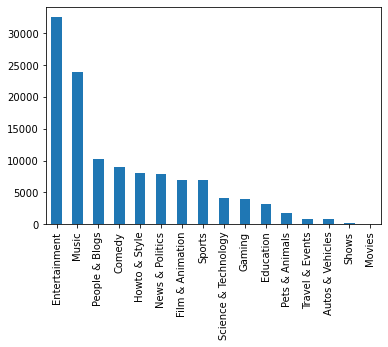

In [39]:
final['category'].value_counts().plot.bar()

In [40]:
final['category'].value_counts()

Entertainment           32539
Music                   23957
People & Blogs          10241
Comedy                   9058
Howto & Style            8081
News & Politics          7871
Film & Animation         6982
Sports                   6868
Science & Technology     4074
Gaming                   3949
Education                3104
Pets & Animals           1823
Travel & Events           890
Autos & Vehicles          881
Shows                     201
Movies                      6
Name: category, dtype: int64

Interesting, entertainment and music dominate the charts. I would include People & Blogs but it's only a ~1000 difference between itself and Comedy.

Now let's see who watches what the most in each category, remember `US = 1`, `CA = 2`, and `GB = 3`

<AxesSubplot:xlabel='category'>

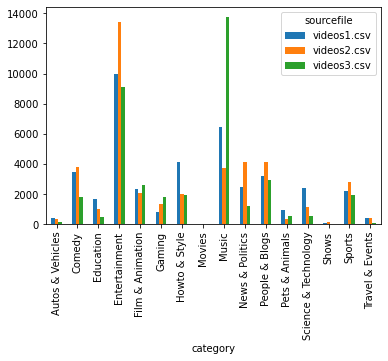

In [41]:
final.groupby('sourcefile')['category'].value_counts().unstack(0).plot.bar()

In [42]:
final.groupby('sourcefile')['category'].value_counts()

sourcefile   category            
videos1.csv  Entertainment            9964
             Music                    6472
             Howto & Style            4146
             Comedy                   3457
             People & Blogs           3210
             News & Politics          2487
             Science & Technology     2401
             Film & Animation         2345
             Sports                   2174
             Education                1656
             Pets & Animals            920
             Gaming                    817
             Travel & Events           402
             Autos & Vehicles          384
             Shows                      57
videos2.csv  Entertainment           13451
             News & Politics          4159
             People & Blogs           4105
             Comedy                   3773
             Music                    3731
             Sports                   2787
             Film & Animation         2060
             Howto &

I'm gonna be honest, I wasn't expecting this at all. Great Britain's main trend seems to be music, Canada's is entertainment, and the US is entertainment but only by a small margin.

With external research, the population size of the US is ~328 million, Canada is ~38 million, and Great Britain(UK) is ~67 million.

I'm not sure how many of each population uses Youtube, but I can infer that since there is a large amount of people in the US, there might not be a single category that stands out above other because different people have different tastes. This is probably why Canada has such a wide gap between entertainment and its next category, as well as why Great Britain has a slightly bigger gap between Music and its next category

I'm curious about the Music and Entertainment category. I was sure that the US would've been at the top for one of those categories. I would like to see what Music and Entertainment channels people watch though.

I'm gonna put music in its own dataframe just incase I make some adjustments to the dataframe I don't want in the final dataframe

In [43]:
music = final[final['category'] == 'Music']
music

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
77633,2017-11-14,Marshmello - Blocks (Official Music Video),marshmello,10,2017-11-13,"marshmello|""blocks""|""marshmello blocks""|""block...",687582,114188,1333,8371,videos1.csv,Music
77634,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158531,787419,43420,125882,videos1.csv,Music
77635,2017-11-14,Hunter Hayes - You Should Be Loved (Part One O...,Hunter Hayes,10,2017-11-13,"Hunter|""Hayes""|""you should be loved""|""the shad...",13917,1318,24,76,videos1.csv,Music
77636,2017-11-14,Nickelback - The Betrayal Act III [Official Vi...,Nickelback,10,2017-11-13,"Nickelback|""Feed The Machine""|""The Betrayal Ac...",57169,6927,161,565,videos1.csv,Music
77637,2017-11-14,U2 - The Blackout,U2VEVO,10,2017-11-13,"U2|""The""|""Blackout""|""Island""|""Records""|""Rock""",60506,5389,106,455,videos1.csv,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
101585,2018-06-14,Jeremy Zucker - all the kids are depressed,JeremyZuckerVEVO,10,2018-05-10,"Jeremy|""Zucker""|""all""|""the""|""kids""|""are""|""depr...",1939400,169578,1202,5889,videos3.csv,Music
101586,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,videos3.csv,Music
101587,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,videos3.csv,Music
101588,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,videos3.csv,Music


Here's a closer look at the gap between GB, US, and CA in the amount of trending music videos

<AxesSubplot:>

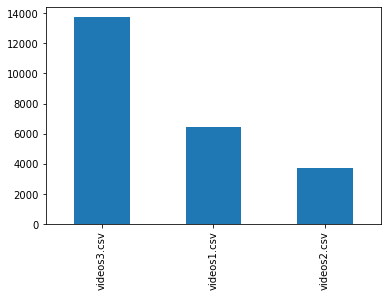

In [44]:
music['sourcefile'].value_counts().plot.bar()

In [45]:
music['channel_title'].value_counts()

SMTOWN              265
jypentertainment    229
ibighit             219
Charlie Puth        219
WORLDSTARHIPHOP     217
                   ... 
BAKA NOT NICE         1
Daily Audio           1
Breezo Baby           1
BigfloetoliVEVO       1
Music Tym             1
Name: channel_title, Length: 1144, dtype: int64

In [46]:
music[music['channel_title'] == 'SMTOWN'].head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
77777,2017-11-18,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",4340962,396790,11280,41890,videos1.csv,Music
77814,2017-11-19,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",6705901,471760,14126,50744,videos1.csv,Music
77856,2017-11-20,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",8097332,505290,15357,55549,videos1.csv,Music
77909,2017-11-21,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",9294823,530259,16331,57820,videos1.csv,Music
77959,2017-11-22,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",10530920,555555,17245,59723,videos1.csv,Music
78016,2017-11-23,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",11825470,575900,18051,61498,videos1.csv,Music
78052,2017-11-24,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",12969561,591776,18790,63191,videos1.csv,Music
78422,2017-12-06,EXO 'Electric Kiss' MV -Short Ver.-,SMTOWN,10,2017-12-05,"EXO|""엑소""|""エクソ""|""COUNTDOWN""|""Electric Kiss""|""SU...",1840613,372289,4995,45491,videos1.csv,Music
78460,2017-12-07,EXO 'Electric Kiss' MV -Short Ver.-,SMTOWN,10,2017-12-05,"EXO|""엑소""|""エクソ""|""COUNTDOWN""|""Electric Kiss""|""SU...",3629402,520838,8114,63981,videos1.csv,Music
78496,2017-12-08,EXO 'Electric Kiss' MV -Short Ver.-,SMTOWN,10,2017-12-05,"EXO|""엑소""|""エクソ""|""COUNTDOWN""|""Electric Kiss""|""SU...",4530965,570831,9099,70832,videos1.csv,Music


In [47]:
music[music['channel_title'] == 'jypentertainment'].head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
78425,2017-12-06,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",1552618,99254,5195,7841,videos1.csv,Music
78462,2017-12-07,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",2270996,114046,6445,9100,videos1.csv,Music
78500,2017-12-08,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",2786678,123270,7142,9700,videos1.csv,Music
78537,2017-12-09,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",3347735,130439,7669,10461,videos1.csv,Music
78565,2017-12-10,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",3738147,134834,8046,10555,videos1.csv,Music
78593,2017-12-11,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",4029821,138170,8311,10809,videos1.csv,Music
78619,2017-12-13,TWICE Heart Shaker M/V,jypentertainment,10,2017-12-11,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",18195959,754791,65326,127305,videos1.csv,Music
78658,2017-12-14,TWICE Heart Shaker M/V,jypentertainment,10,2017-12-11,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",23584659,806411,72397,139142,videos1.csv,Music
78696,2017-12-15,TWICE Heart Shaker M/V,jypentertainment,10,2017-12-11,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",28475675,850681,78137,137057,videos1.csv,Music
78735,2017-12-16,TWICE Heart Shaker M/V,jypentertainment,10,2017-12-11,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",33896316,899117,84383,147922,videos1.csv,Music


In [48]:
music[music['channel_title'] == 'ibighit'].head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
77746,2017-11-17,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",3483755,789750,2840,72376,videos1.csv,Music
77782,2017-11-18,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",5158539,926887,3814,79570,videos1.csv,Music
77818,2017-11-19,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",6066643,976120,4272,82380,videos1.csv,Music
77862,2017-11-20,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",6674015,1003201,4600,84010,videos1.csv,Music
77918,2017-11-21,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",7098772,1021297,4766,85460,videos1.csv,Music
77969,2017-11-22,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",7475081,1035003,4901,86912,videos1.csv,Music
78057,2017-11-25,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",13945717,2055137,23888,395562,videos1.csv,Music
78092,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",20565795,2320638,33225,477215,videos1.csv,Music
78126,2017-11-27,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",24628712,2454898,37133,502471,videos1.csv,Music
78160,2017-11-28,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",27661280,2542861,41121,519092,videos1.csv,Music


Top 3 channels in the music category are all K-Pop. No surprise there to be honest, I believe this was around the time ibithit's BTS started blowing up, competing with SMTOWN's EXO. JYP Entertainment has TWICE, and the general population loves them, and they recently debuted Stray Kids, a new boy group during 2018 as well. 

Charlie Puth is high up there with the release of his album Voicenotes(I believe), as well as a feature with Kehlani.

Not really sure what WORLDSTARHIPHOP is

Onto the entertainment category!

Same thing, making the entertainment its own dataframe and analyzing.

In [49]:
ent = final[final['category'] == 'Entertainment']
ent

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10241,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,videos1.csv,Entertainment
10242,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,videos1.csv,Entertainment
10243,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,videos1.csv,Entertainment
10244,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,videos1.csv,Entertainment
10245,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,24,2017-11-13,"The Walking Dead|""shiva""|""tiger""|""king ezekiel...",104578,1576,303,1279,videos1.csv,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
42775,2018-06-14,This Is America: Women's Edit,Nicole Arbour,24,2018-05-12,"Nicole Arbour|""World's Sexiest Comedian""|""funn...",3158685,0,0,0,videos3.csv,Entertainment
42776,2018-06-14,Juice Wrld - Lucid Dreams (Dir. by @_ColeBenne...,Cole Bennett - Lyrical Lemonade,24,2018-05-11,"Juice Wrld|""Lucid Dreams""|""Music Video""|""Hip H...",20981880,437224,8516,37560,videos3.csv,Entertainment
42777,2018-06-14,Hidden Meanings Behind Childish Gambino's 'Thi...,INSIDER,24,2018-05-09,"INSIDER|""this is america""|""childish gambino""|""...",14261473,234355,22315,23450,videos3.csv,Entertainment
42778,2018-06-14,Owner CANNOT Handle Gordon's Criticism | Kitch...,Kitchen Nightmares,24,2018-05-09,"Gordon|""Gordon Ramsay""|""Ramsay""|""Ramsey""|""Chef...",2665975,26126,599,3377,videos3.csv,Entertainment


<AxesSubplot:>

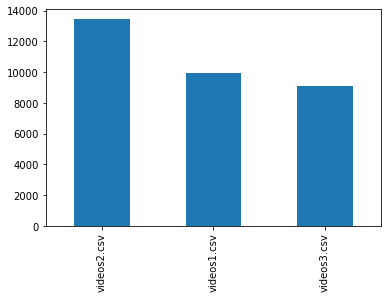

In [50]:
ent['sourcefile'].value_counts().plot.bar()

We can see that Canada has more trending entertainment videos about ~2500 more than the US, with GB trailing a little bit behind.

In [51]:
ent['channel_title'].value_counts()

TheEllenShow                            550
The Late Show with Stephen Colbert      474
Netflix                                 459
The Late Late Show with James Corden    414
Saturday Night Live                     402
                                       ... 
Koalatea Korner                           1
Bill Omar                                 1
Ahmed & Wajeeh                            1
Tropicana Canada                          1
WDW Details                               1
Name: channel_title, Length: 1662, dtype: int64

Top channels to trend are TheEllenShow, Stephen Colbert, and Netflix. Let's see the content of these channels.

In [52]:
ent[ent['channel_title'] == 'TheEllenShow'].head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10264,2017-11-14,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,24,2017-11-10,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,275,videos1.csv,Entertainment
10296,2017-11-15,Colin Farrell Dishes on Rendezvous with Girlfr...,TheEllenShow,24,2017-11-14,"Colin|""Farrell""|""Colin Farrell""|""The killing o...",137860,1950,64,136,videos1.csv,Entertainment
10334,2017-11-16,Kim Kardashian Lets Gender of Third Child Slip,TheEllenShow,24,2017-11-15,"kim|""kardashian""|""kim kardashian west""|""kim k""...",1559003,29898,884,1838,videos1.csv,Entertainment
10385,2017-11-17,Blake Shelton Is Milking His Title of Sexiest ...,TheEllenShow,24,2017-11-16,"Blake|""Shelton""|""Blake Shelton""|""Country music...",340348,5474,372,653,videos1.csv,Entertainment
10431,2017-11-18,Lin-Manuel Miranda and Macey Hensley Face Off ...,TheEllenShow,24,2017-11-17,"Cheerios|""Lin-Manuel Miranda""|""Lin-Manuel""|""Mi...",185707,7018,57,347,videos1.csv,Entertainment
10482,2017-11-19,Lin-Manuel Miranda and Macey Hensley Face Off ...,TheEllenShow,24,2017-11-17,"Cheerios|""Lin-Manuel Miranda""|""Lin-Manuel""|""Mi...",311937,9928,125,444,videos1.csv,Entertainment
10537,2017-11-20,Lin-Manuel Miranda and Macey Hensley Face Off ...,TheEllenShow,24,2017-11-17,"Cheerios|""Lin-Manuel Miranda""|""Lin-Manuel""|""Mi...",366465,11098,152,472,videos1.csv,Entertainment
10589,2017-11-21,Lin-Manuel Miranda and Macey Hensley Face Off ...,TheEllenShow,24,2017-11-17,"Cheerios|""Lin-Manuel Miranda""|""Lin-Manuel""|""Mi...",391853,11765,158,523,videos1.csv,Entertainment
10615,2017-11-22,Sofia Vergara Wants to See Ellen in Her Underwear,TheEllenShow,24,2017-11-21,"Sofia Vergara|""Sofia""|""Vergara""|""Sofia Vergara...",1002131,16443,598,811,videos1.csv,Entertainment
10665,2017-11-23,Ellen Surprises the Audience with Channing Tat...,TheEllenShow,24,2017-11-22,"channing|""tatum""|""channing tatum""|""12 days""|""g...",338500,7047,86,321,videos1.csv,Entertainment


In [53]:
ent[ent['channel_title'] == 'The Late Show with Stephen Colbert'].head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10267,2017-11-14,Sean Astin Knew Nothing About 'Lord Of The Rin...,The Late Show with Stephen Colbert,24,2017-11-09,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",844653,11616,313,1518,videos1.csv,Entertainment
10325,2017-11-15,Sean Astin Knew Nothing About 'Lord Of The Rin...,The Late Show with Stephen Colbert,24,2017-11-09,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",908489,12261,339,1600,videos1.csv,Entertainment
10383,2017-11-17,Jordan Peele Crashed A 'Get Out' College Course,The Late Show with Stephen Colbert,24,2017-11-16,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",406769,6593,397,1253,videos1.csv,Entertainment
10429,2017-11-18,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1291361,16081,1368,2877,videos1.csv,Entertainment
10478,2017-11-19,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1612055,18320,1968,3563,videos1.csv,Entertainment
10532,2017-11-20,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1743129,19277,2172,3881,videos1.csv,Entertainment
10586,2017-11-21,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1864545,20105,2247,4107,videos1.csv,Entertainment
10637,2017-11-22,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",2016029,21062,2319,4200,videos1.csv,Entertainment
10668,2017-11-23,"Daveed Diggs Doesn't Always Cry At Movies, Jus...",The Late Show with Stephen Colbert,24,2017-11-22,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",81878,1302,29,144,videos1.csv,Entertainment
10714,2017-11-24,"Daveed Diggs Doesn't Always Cry At Movies, Jus...",The Late Show with Stephen Colbert,24,2017-11-22,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",100921,1519,53,168,videos1.csv,Entertainment


In [54]:
ent[ent['channel_title'] == 'Netflix'].head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10271,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,2017-11-09,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,videos1.csv,Entertainment
10439,2017-11-18,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",47358,1358,179,145,videos1.csv,Entertainment
10490,2017-11-19,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",78147,1591,217,197,videos1.csv,Entertainment
10546,2017-11-20,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",98684,1714,235,244,videos1.csv,Entertainment
10598,2017-11-21,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",115219,1835,244,261,videos1.csv,Entertainment
10648,2017-11-22,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",128002,1939,253,266,videos1.csv,Entertainment
10670,2017-11-23,The Crown - Season 2 | Trailer: Philip [HD] | ...,Netflix,24,2017-11-22,"Netflix|""Trailer""|""Netflix Original Series""|""N...",41474,1152,17,86,videos1.csv,Entertainment
10709,2017-11-24,The Crown - Season 2 | Trailer: Philip [HD] | ...,Netflix,24,2017-11-22,"Netflix|""Trailer""|""Netflix Original Series""|""N...",81706,1677,32,158,videos1.csv,Entertainment
10757,2017-11-25,The Crown - Season 2 | Trailer: Philip [HD] | ...,Netflix,24,2017-11-22,"Netflix|""Trailer""|""Netflix Original Series""|""N...",116657,2162,47,207,videos1.csv,Entertainment
10795,2017-11-26,Black Mirror - Arkangel | Official Trailer [HD...,Netflix,24,2017-11-25,"Charlie Brooker|""Humans""|""arkep""|""Jesse Plemon...",823882,13276,561,1735,videos1.csv,Entertainment


I'm gonna be honest, I don't really follow this entertainment category as well as I do in music and gaming, however it seems like these channels just have large followings from their TV airings, and in Netflix's case, their platform, that come and support or watch what they missed on Youtube. 

Netflix's case is a bit more different however, because they offer a lot of very popular shows and movies so trailers would bring more hype. 

One interesting observation, is that despite lower view and comment count compared to music, they were still able to trend for multiple days.

I'm gonna take a look at the percentage of total likes within the whole database, and compare it to one video from each of these channels.

For example, I will get the total percentage of likes, and then get the earliest time of when a video was trending and find its like ratio and compare.

In [55]:
totalratings = final['likes'].sum() + final['dislikes'].sum()
likeratio = final['likes'].sum() / totalratings
likeratio

0.949894849448073

So I've found that there are ~95% likes to ~5% dislikes on a given trending video, now let's see if that applies to each channel.

In [56]:
music[music['channel_title'] == 'SMTOWN'].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
77777,2017-11-18,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",4340962,396790,11280,41890,videos1.csv,Music
77814,2017-11-19,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",6705901,471760,14126,50744,videos1.csv,Music
77856,2017-11-20,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",8097332,505290,15357,55549,videos1.csv,Music
77909,2017-11-21,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",9294823,530259,16331,57820,videos1.csv,Music
77959,2017-11-22,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,SMTOWN,10,2017-11-17,"Red Velvet|""레드벨벳""|""피카부""|""PeekABoo""|""Peek-A-Boo...",10530920,555555,17245,59723,videos1.csv,Music


In [57]:
rv_totalratings = 396790 + 11280
rv_likeratio = 396790 / rv_totalratings
rv_likeratio

0.9723576837307325

In [58]:
music[music['channel_title'] == 'jypentertainment'].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
78425,2017-12-06,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",1552618,99254,5195,7841,videos1.csv,Music
78462,2017-12-07,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",2270996,114046,6445,9100,videos1.csv,Music
78500,2017-12-08,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",2786678,123270,7142,9700,videos1.csv,Music
78537,2017-12-09,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",3347735,130439,7669,10461,videos1.csv,Music
78565,2017-12-10,TWICE Heart Shaker M/V TEASER (30s Ver.),jypentertainment,10,2017-12-05,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",3738147,134834,8046,10555,videos1.csv,Music


In [59]:
tw_totalratings = 99254 + 5195
tw_likeratio = 99254 / tw_totalratings
tw_likeratio

0.9502628076860478

In [60]:
music[music['channel_title'] == 'ibighit'].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
77746,2017-11-17,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",3483755,789750,2840,72376,videos1.csv,Music
77782,2017-11-18,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",5158539,926887,3814,79570,videos1.csv,Music
77818,2017-11-19,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",6066643,976120,4272,82380,videos1.csv,Music
77862,2017-11-20,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",6674015,1003201,4600,84010,videos1.csv,Music
77918,2017-11-21,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-16,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",7098772,1021297,4766,85460,videos1.csv,Music


In [61]:
bts_totalratings = 789750 + 2840
bts_likeratio = 789750 / bts_totalratings
bts_likeratio

0.9964168107091939

In [62]:
ent[ent['channel_title'] == 'TheEllenShow'].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10264,2017-11-14,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,24,2017-11-10,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,275,videos1.csv,Entertainment
10296,2017-11-15,Colin Farrell Dishes on Rendezvous with Girlfr...,TheEllenShow,24,2017-11-14,"Colin|""Farrell""|""Colin Farrell""|""The killing o...",137860,1950,64,136,videos1.csv,Entertainment
10334,2017-11-16,Kim Kardashian Lets Gender of Third Child Slip,TheEllenShow,24,2017-11-15,"kim|""kardashian""|""kim kardashian west""|""kim k""...",1559003,29898,884,1838,videos1.csv,Entertainment
10385,2017-11-17,Blake Shelton Is Milking His Title of Sexiest ...,TheEllenShow,24,2017-11-16,"Blake|""Shelton""|""Blake Shelton""|""Country music...",340348,5474,372,653,videos1.csv,Entertainment
10431,2017-11-18,Lin-Manuel Miranda and Macey Hensley Face Off ...,TheEllenShow,24,2017-11-17,"Cheerios|""Lin-Manuel Miranda""|""Lin-Manuel""|""Mi...",185707,7018,57,347,videos1.csv,Entertainment


In [63]:
el_colin_totalratings = 3305 + 130
el_colin_likeratio = 3305 / el_colin_totalratings
el_colin_likeratio

0.9621542940320232

In [64]:
ent[ent['channel_title'] == 'The Late Show with Stephen Colbert'].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10267,2017-11-14,Sean Astin Knew Nothing About 'Lord Of The Rin...,The Late Show with Stephen Colbert,24,2017-11-09,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",844653,11616,313,1518,videos1.csv,Entertainment
10325,2017-11-15,Sean Astin Knew Nothing About 'Lord Of The Rin...,The Late Show with Stephen Colbert,24,2017-11-09,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",908489,12261,339,1600,videos1.csv,Entertainment
10383,2017-11-17,Jordan Peele Crashed A 'Get Out' College Course,The Late Show with Stephen Colbert,24,2017-11-16,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",406769,6593,397,1253,videos1.csv,Entertainment
10429,2017-11-18,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1291361,16081,1368,2877,videos1.csv,Entertainment
10478,2017-11-19,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1612055,18320,1968,3563,videos1.csv,Entertainment


In [65]:
sc_jordanpeele_totalratings = 11616 + 313
sc_jordanpeele_likeratio = 11616 / sc_jordanpeele_totalratings
sc_jordanpeele_likeratio

0.9737614217453265

In [66]:
ent[ent['channel_title'] == 'Netflix'].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
10271,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,2017-11-09,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,videos1.csv,Entertainment
10439,2017-11-18,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",47358,1358,179,145,videos1.csv,Entertainment
10490,2017-11-19,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",78147,1591,217,197,videos1.csv,Entertainment
10546,2017-11-20,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",98684,1714,235,244,videos1.csv,Entertainment
10598,2017-11-21,A Christmas Prince | Official Trailer [HD] | N...,Netflix,24,2017-11-17,"Netflix|""Trailer""|""Netflix Original Series""|""N...",115219,1835,244,261,videos1.csv,Entertainment


In [67]:
nf_christmasprince_totalratings = 1358 + 179
nf_christmasprince_likeratio = 1358 / nf_christmasprince_totalratings
nf_christmasprince_likeratio

0.8835393623942746

In [68]:
print(f"So we have that SMTOWN has {rv_likeratio},\nJYP has {tw_likeratio},\nBTS has {bts_likeratio},\nEllen has {el_colin_likeratio},\nStephen Colbert has {sc_jordanpeele_likeratio},\nand Netflix has {nf_christmasprince_likeratio}\ncompared to the total {likeratio}")

So we have that SMTOWN has 0.9723576837307325,
JYP has 0.9502628076860478,
BTS has 0.9964168107091939,
Ellen has 0.9621542940320232,
Stephen Colbert has 0.9737614217453265,
and Netflix has 0.8835393623942746
compared to the total 0.949894849448073


There is a general trend that the like ratio must be near 95% or within a certain range of 95%. The lowest one being Netflix at 88%. This makes me wonder, does Youtube factor general interactions (likes, dislikes, comments) for a trending video? Meaning, no matter the like ratio, I wonder if total interactions can help a video trend. Let's find the video with the most dislikes.

In [69]:
final.loc[final['dislikes'].idxmax()]

trending_date                                  2018-01-18 00:00:00
title                                                    So Sorry.
channel_title                                     Logan Paul Vlogs
category_id                                                     24
publish_time                                   2018-01-02 00:00:00
tags             logan paul vlog|"logan paul"|"logan"|"paul"|"o...
views                                                     45349447
likes                                                      1572111
dislikes                                                   1944971
comment_count                                              1626501
sourcefile                                             videos3.csv
category                                             Entertainment
Name: 36671, dtype: object

Man I forgot about this guy. Unfortunately not surprised to see Logan Paul have the most dislikes to likes. This was an apology video to a very inconsiderate video he made with his brother. Let's see when this first trended.

In [70]:
final[final['title'] == "So Sorry."].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
12665,2018-01-03,So Sorry.,Logan Paul Vlogs,24,2018-01-02,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",13305605,835378,629120,733373,videos1.csv,Entertainment
12710,2018-01-04,So Sorry.,Logan Paul Vlogs,24,2018-01-02,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",23389090,1082422,1065772,1059651,videos1.csv,Entertainment
12757,2018-01-05,So Sorry.,Logan Paul Vlogs,24,2018-01-02,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",28407744,1204072,1278887,1238817,videos1.csv,Entertainment
12803,2018-01-06,So Sorry.,Logan Paul Vlogs,24,2018-01-02,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",31675237,1275142,1415777,1194249,videos1.csv,Entertainment
12845,2018-01-07,So Sorry.,Logan Paul Vlogs,24,2018-01-02,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",33998325,1325296,1517520,1281094,videos1.csv,Entertainment


In [71]:
ah_totalratings = 835378 + 629120
ah_likeratio = 835378 / ah_totalratings
print(f"Percentage of likes: {ah_likeratio}\n Total number of likes/dislikes: {ah_totalratings}")

Percentage of likes: 0.5704193518871313
 Total number of likes/dislikes: 1464498


Publish time was January 2nd, trending was January 3rd. 57% likes 43% dislikes, 7,333,373 comments out of 13,305,605 views, 1,464,498 total likes/dislikes

There is the potential of having a video that is very controversial become trending but it makes sense considering the number of engagements the video has. 

# Time to make a model

So, I learned that I probably won't be able to tell how a video becomes trending, however I can see if I can predict the ratio of views to likes, dislikes, and comments respectively.

So to begin, I'm gonna make a copy of the final dataset, change some columns to be in float format, and reorder the dataset by trending date.

Reordering the dataset is to check the trend from videos in 2017 against videos in 2018.

In [72]:
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

copy = final.copy()

LE = LabelEncoder()
LE.fit(copy['views'])
copy['views'] = LE.transform(copy['views'].values).astype(float)
LE.fit(copy['likes'])
copy['likes'] = LE.transform(copy['likes'].values).astype(float)
LE.fit(copy['dislikes'])
copy['dislikes'] = LE.transform(copy['dislikes'].values).astype(float)
LE.fit(copy['comment_count'])
copy['comment_count'] = LE.transform(copy['comment_count'].values).astype(float)

copy.sort_values(by='trending_date',ignore_index=True,inplace=True)
copy.loc[copy['trending_date']=='2018-01-01']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,sourcefile,category
28742,2018-01-01,[STATION] SMTOWN 'Dear My Family (Live Concert...,SMTOWN,10,2017-12-29,"SM STATION|""SMTOWN""|""Dear My Family""|""SM Enter...",84691.0,52512.0,803.0,15407.0,videos1.csv,Music
28743,2018-01-01,Console Security - Switch (34c3 Lecture with d...,Austin Burk,10,2017-12-29,"34c3|""nintendo switch""|""switch homebrew""|""swit...",1057.0,107.0,4.0,15.0,videos1.csv,Music
28744,2018-01-01,ACCIDENTAL RING SHOPPING & PARTY TIME | VLOGMAS,MoreZoella,22,2017-12-16,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",68698.0,32514.0,537.0,346.0,videos3.csv,People & Blogs
28745,2018-01-01,Eminem - Walk On Water (Official Video) ft. Be...,EminemVEVO,10,2017-12-24,"Eminem|""Walk""|""On""|""Water""|""Aftermath""|""Shady""...",101205.0,55469.0,12329.0,20084.0,videos1.csv,Music
28746,2018-01-01,Camila Cabello - Havana (SING OFF vs. My Littl...,Conor Maynard,10,2017-12-25,"havana|""camila cabello""|""havana camila cabello...",98091.0,53727.0,6900.0,15812.0,videos1.csv,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
29334,2018-01-01,Chelsea Records a Song with Diplo | Chelsea | ...,Chelsea,24,2017-12-15,"Chelsea Handler|""Chelsea Netflix""|""Chelsea Han...",18602.0,2443.0,196.0,379.0,videos3.csv,Entertainment
29335,2018-01-01,THE LAST JEDI Rant,The Rageaholic,24,2017-12-28,"The Last Jedi|""Star Wars""|""Luke Skywalker""|""Lu...",22321.0,8253.0,892.0,2525.0,videos3.csv,Entertainment
29336,2018-01-01,Crosswalk the Musical on Broadway (w/ Hugh Jac...,The Late Late Show with James Corden,24,2017-12-15,"James Corden|""The Late Late Show""|""Colbert""|""l...",95132.0,43072.0,2401.0,3657.0,videos3.csv,Entertainment
29337,2018-01-01,Best of the Worst: Merry Kick-mas!,RedLetterMedia,24,2017-12-28,"redlettermedia|""red letter media""|""red""|""lette...",46106.0,14677.0,335.0,4089.0,videos3.csv,Entertainment


In [73]:
views_train = copy.iloc[:28741].copy() #2017
views_test = copy.iloc[28742:].copy() #2018

In [74]:
X_train = copy[['likes']]
y_train = copy['views']

#X_train = ames_df[["SalePrice"]]
X_test = copy[['likes']]
#y_train = ames_df["Gr Liv Area"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([ 74313.18630021,  26601.11917751,  24645.71890071, ...,
        71132.28170246, 105887.94468693,  46728.82617422])

<AxesSubplot:xlabel='likes', ylabel='views'>

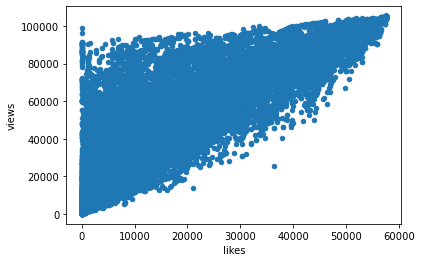

In [75]:
views_train.plot.scatter(x="likes", y="views") #2017 views to likes

<AxesSubplot:xlabel='likes', ylabel='views'>

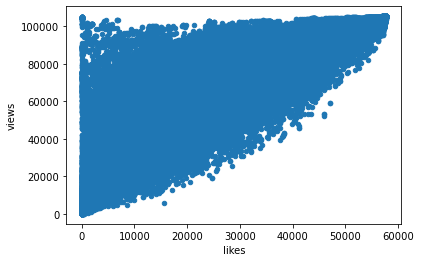

In [76]:
views_test.plot.scatter(x="likes", y="views") #2018 views to likes

So we can see that generally, 2017 and 2018 have the same views vs likes spread. Now I want to see if we can make a linear regression line to predict the trend.

# 2017 Views Vs Likes Linear Regression

<AxesSubplot:xlabel='likes', ylabel='views'>

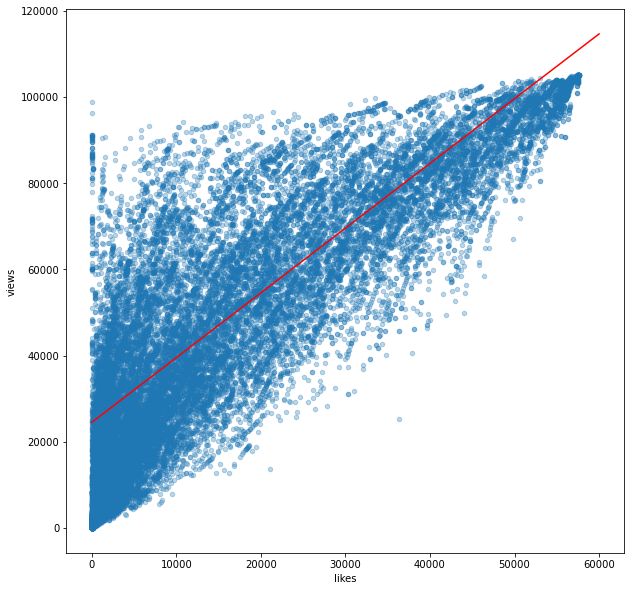

In [77]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["likes"] = np.linspace(0, 60000, num=300)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["likes"]    # x values in Series.plot.line()
)

# plot the data, then the model
views_train.plot.scatter(x="likes", y="views",figsize=(10,10), alpha=.3)
y_new_.plot.line(color="red")

# 2018 Views vs Likes Linear Regression

<AxesSubplot:xlabel='likes', ylabel='views'>

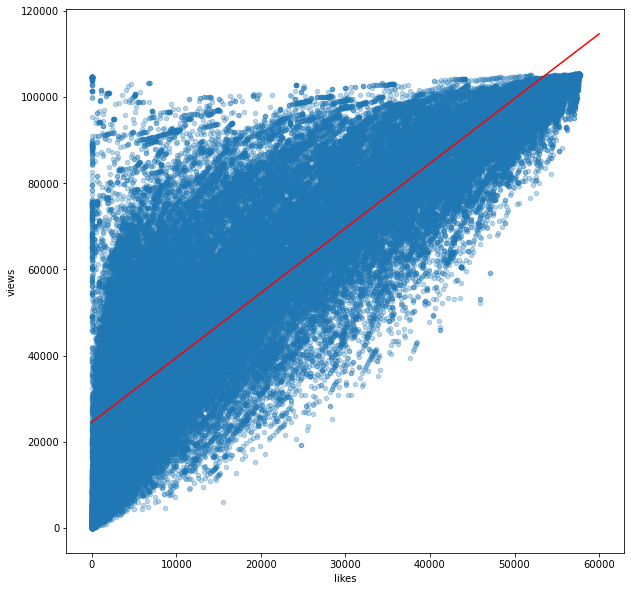

In [78]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["likes"] = np.linspace(0, 60000, num=300)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["likes"]    # x values in Series.plot.line()
)

# plot the data, then the model
views_test.plot.scatter(x="likes", y="views",figsize=(10,10),alpha = .3)
y_new_.plot.line(color="red")

# Views vs Likes 2017 and 2018

So we can see that, despite 2018 having more videos that have trended, they do follow the same trend. We can conclude that the higher the viewcount, the higher the amount of likes.

I have a theory that maybe it works the same for dislikes and comments. Let's check it out

# 2017 Views vs Dislikes Linear Regression

In [79]:
X_train = copy[['dislikes']]
y_train = copy['views']

#X_train = ames_df[["SalePrice"]]
X_test = copy[['dislikes']]
#y_train = ames_df["Gr Liv Area"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([ 61063.15977247,  41786.90257118,  41541.89346213, ...,
        49335.83187708, 126374.64200412,  42535.17363396])

<AxesSubplot:xlabel='dislikes', ylabel='views'>

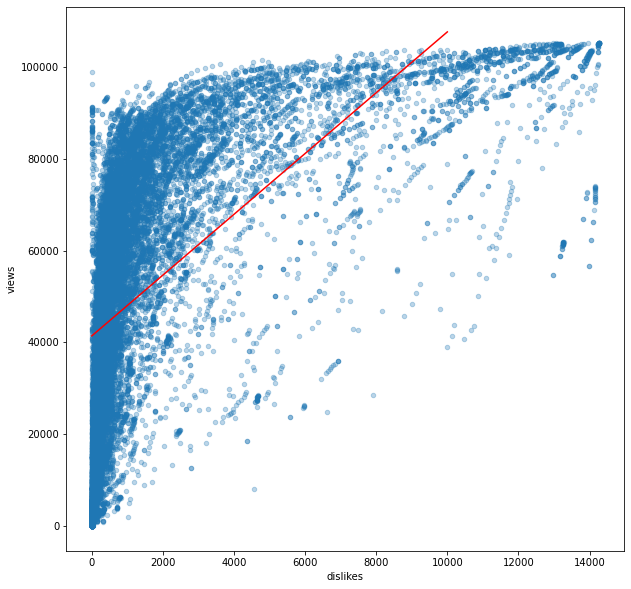

In [80]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new['dislikes'] = np.linspace(0, 10000, num=300)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new['dislikes']    # x values in Series.plot.line()
)

# plot the data, then the model
views_train.plot.scatter(x="dislikes", y="views",figsize=(10,10), alpha=.3)
y_new_.plot.line(color="red")

# 2018 Views vs Dislikes Linear Regression

<AxesSubplot:xlabel='dislikes', ylabel='views'>

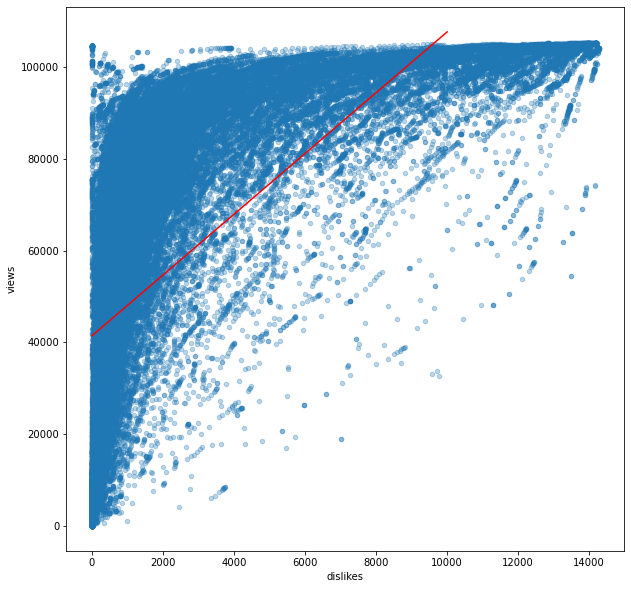

In [81]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new['dislikes'] = np.linspace(0, 10000, num=300)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new['dislikes']    # x values in Series.plot.line()
)

# plot the data, then the model
views_test.plot.scatter(x="dislikes", y="views",figsize=(10,10), alpha=.3)
y_new_.plot.line(color="red")

# Views vs Dislikes 2017 and 2018

So we can see that the general shape is kind of like a boomerang. It's kind of like a square root function where it grows upwards, and plateaus to the right.

But the linear regression line is still pretty accurate. The more views, the more likely you are to get more dislikes

# 2017 Views vs Comment Count Linear Regression

In [82]:
X_train = copy[['comment_count']]
y_train = copy['views']

#X_train = ames_df[["SalePrice"]]
X_test = copy[['comment_count']]
#y_train = ames_df["Gr Liv Area"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([ 87265.7944694 ,  37475.23657463,  37084.26242548, ...,
        46819.51873941, 100062.37837121,  43629.16968232])

<AxesSubplot:xlabel='comment_count', ylabel='views'>

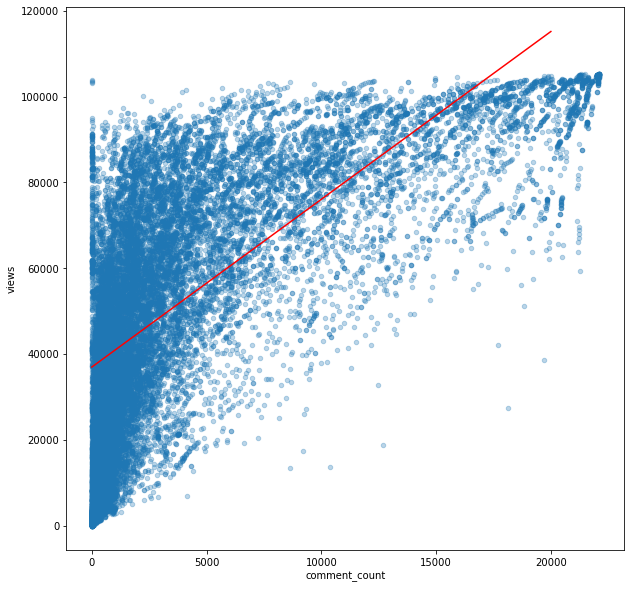

In [83]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new['comment_count'] = np.linspace(0, 20000, num=300)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new['comment_count']    # x values in Series.plot.line()
)

# plot the data, then the model
views_train.plot.scatter(x="comment_count", y="views",figsize=(10,10),alpha = .3)
y_new_.plot.line(color="red")

# 2018 Views vs Comment Count Linear Regression

<AxesSubplot:xlabel='comment_count', ylabel='views'>

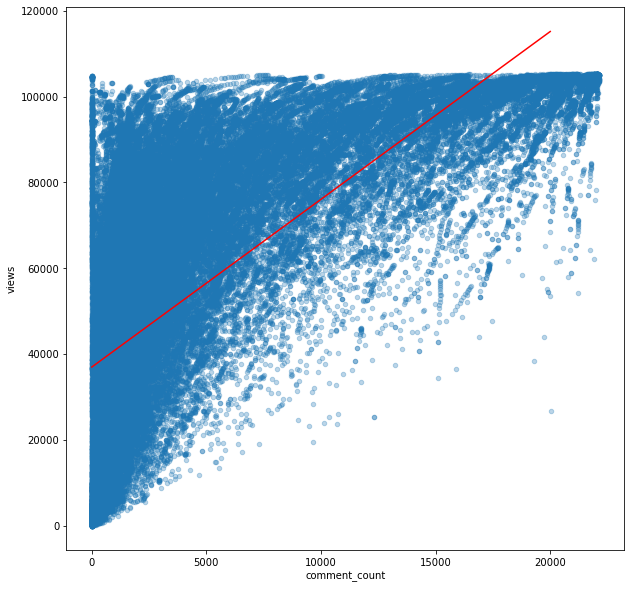

In [84]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new['comment_count'] = np.linspace(0, 20000, num=300)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new['comment_count']    # x values in Series.plot.line()
)

# plot the data, then the model
views_test.plot.scatter(x="comment_count", y="views",figsize=(10,10),alpha = .3)
y_new_.plot.line(color="red")

# Views vs Comment Count 2017 and 2018

Just like the views vs likes trend, it's pretty much the same. Higher the viewcount, more likely to be more comments. 

# Analysis

So here's the thing. As you can see, there are cells in which there are a lot of views, however there are 0 likes, dislikes, and comments. 

There are a few reasons for this:
1) ratings were disabled
2) comments were disabled
3) video was made private
4) video was taken down
5) video was actually trending without any of these

And this is unfortunate because it does skew our data because we don't know for sure which videos actually have 0 of those interactions. There are videos that truly do have 100% like ratio, or 100% dislike, but the thing is, I can't remove that data or else it'll be an unfair representation. It's risking the integrity of the prediction, in a way.

Unfortunately this was a very basic prediction because it's pretty intuitive that the higher views something gets, the more interactions it would get as well. But with the way this dataset was gathered, it was hard to really diverge from doing just that. Maybe I could've tried to see how often a single channel was trending, and maybe try to predict when it would be trending again, but at the moment I have no clue how that would be done.

All in all, this was a very fun project, and it was nice to see that this machine learning method can actually predict the trend. I think if I were to do this project again, I would probably try to work more with the API so I could get some more recent videos.